<a href="https://colab.research.google.com/github/Torabiy/HLS-CMDS/blob/main/HLS_CDMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart and Lung Sounds Dataset Recorded from a Clinical Manikin using Digital Stethoscope (HLS-CMDS)

**For more details, including collection methods and technical information, please visit:**

- **Mendeley Data DOI**: [Insert Mendeley DOI Here](https://doi.org/InsertMendeleyDOI)
- **Dataset Paper DOI**: [Insert Dataset Paper DOI Here](https://doi.org/InsertDatasetPaperDOI)

## About the Dataset

This dataset contains high-quality recordings of heart and lung sounds captured using a digital stethoscope from a clinical manikin. This dataset includes both individual and mixed recordings of heart and lung sounds. It includes recordings from different anatomical chest locations, with normal and abnormal sounds. Each recording has been filtered to highlight specific sound types, making it valuable for artificial intelligence (AI) research and applications in areas such as automated cardiopulmonary disease detection, sound classification, and deep learning algorithms related to audio signal processing.

- **Recording Sources:** Heart and lung sounds captured from a clinical manikin simulating real physiological conditions.
- **Data Type:** Audio files (.wav format)
- **Sound Types:** Normal Heart, Late Diastolic Murmur, Mid Systolic Murmur, Late Systolic Murmur, Atrial Fibrillation, Fourth Heart Sound, Early Systolic Murmur, Third Heart Sound, Tachycardia, Atrioventricular Block, Normal Lung, Wheezing, Crackles, Rhonchi, Pleural Rub, and Gurgling.
- **Auscultation Landmarks:** Right Upper Sternal Border, Left Upper Sternal Border, Lower Left Sternal Border, Right Costal Margin, Left Costal Margin, Apex, Right Upper Anterior, Left Upper Anterior, Right Mid Anterior, Left Mid Anterior, Right Lower Anterior, and Left Lower Anterior.
- **Applications:** AI-based cardiopulmonary disease detection, unsupervised sound separation techniques, deep learning for audio signal processing.


## Section 1: Plotting Audio Waveforms

This section demonstrates how to load and visualize heart and lung sounds as time-domain waveforms, providing a clear representation of the amplitude variations over time.


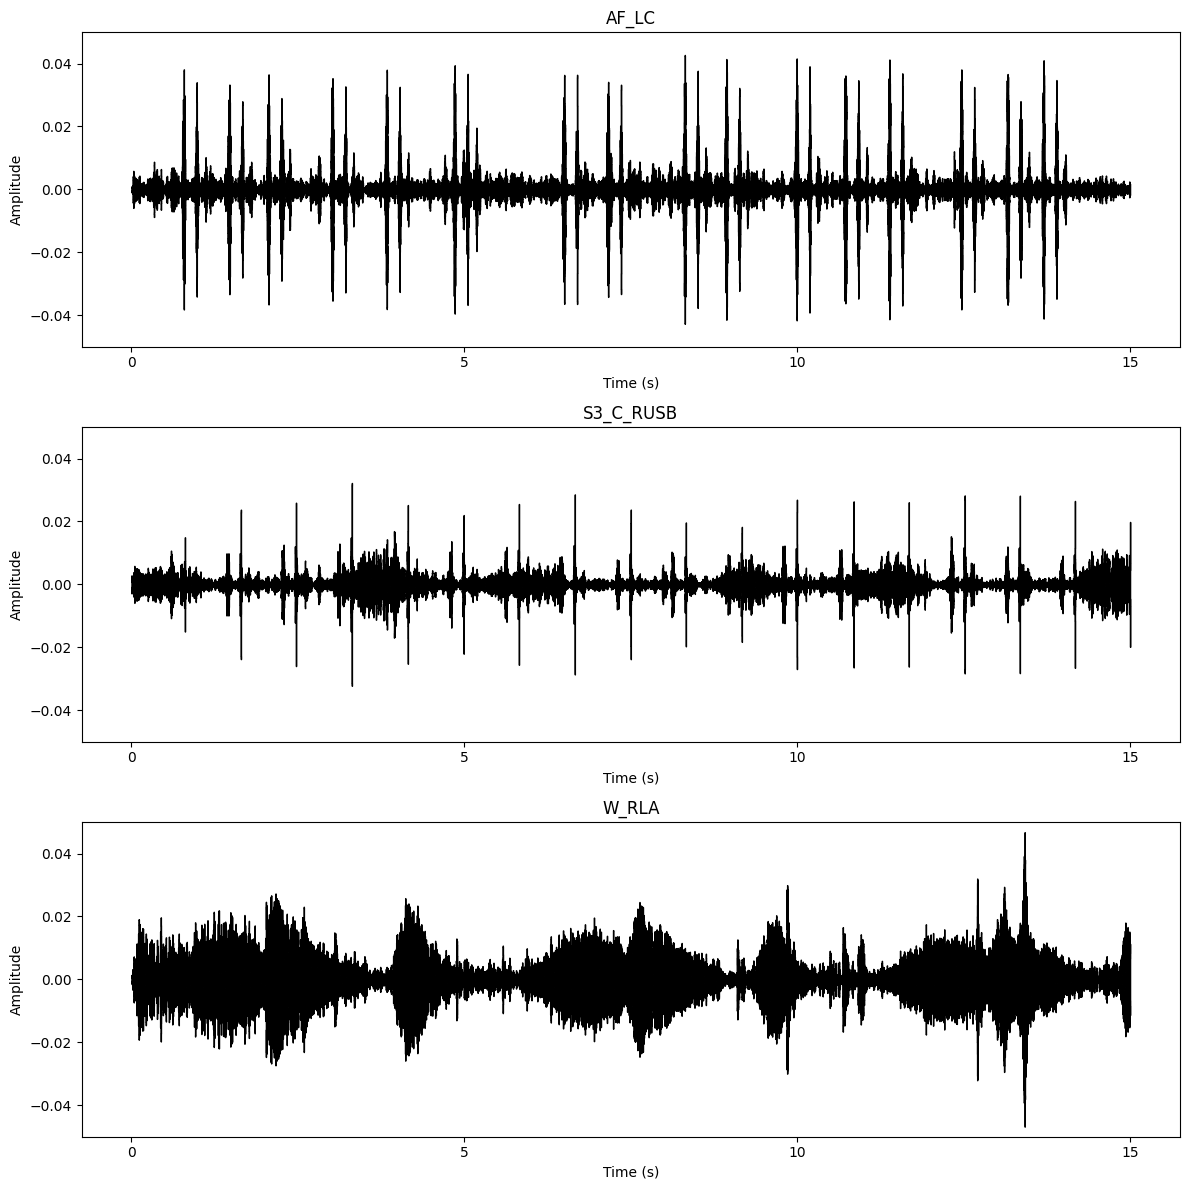

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Set up the figure for subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column, larger figure size

# Plot 1: AF_LC
audio_path_1 = '/content/M_AF_LC.wav' # Update paths if necessary
y1, sr1 = librosa.load(audio_path_1)
librosa.display.waveshow(y1, sr=sr1, color='black', ax=axs[0])
axs[0].set_title('AF_LC')
axs[0].set_ylim([-0.05, 0.05])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Plot 2: S3_C_RUSB
audio_path_2 = '/content/M_S3_C_RUSB.wav'
y2, sr2 = librosa.load(audio_path_2)
librosa.display.waveshow(y2, sr=sr2, color='black', ax=axs[1])
axs[1].set_title('S3_C_RUSB')
axs[1].set_ylim([-0.05, 0.05])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

# Plot 3: W_RLA
audio_path_3 = '/content//M_W_RLA.wav'
y3, sr3 = librosa.load(audio_path_3)
librosa.display.waveshow(y3, sr=sr3, color='black', ax=axs[2])
axs[2].set_title('W_RLA')
axs[2].set_ylim([-0.05, 0.05])
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


## Section 2: Plotting Mel Spectrogram

This section demonstrates how to generate and plot mel spectrograms from the dataset using `librosa`, representing the frequency content of heart and lung sounds over time.


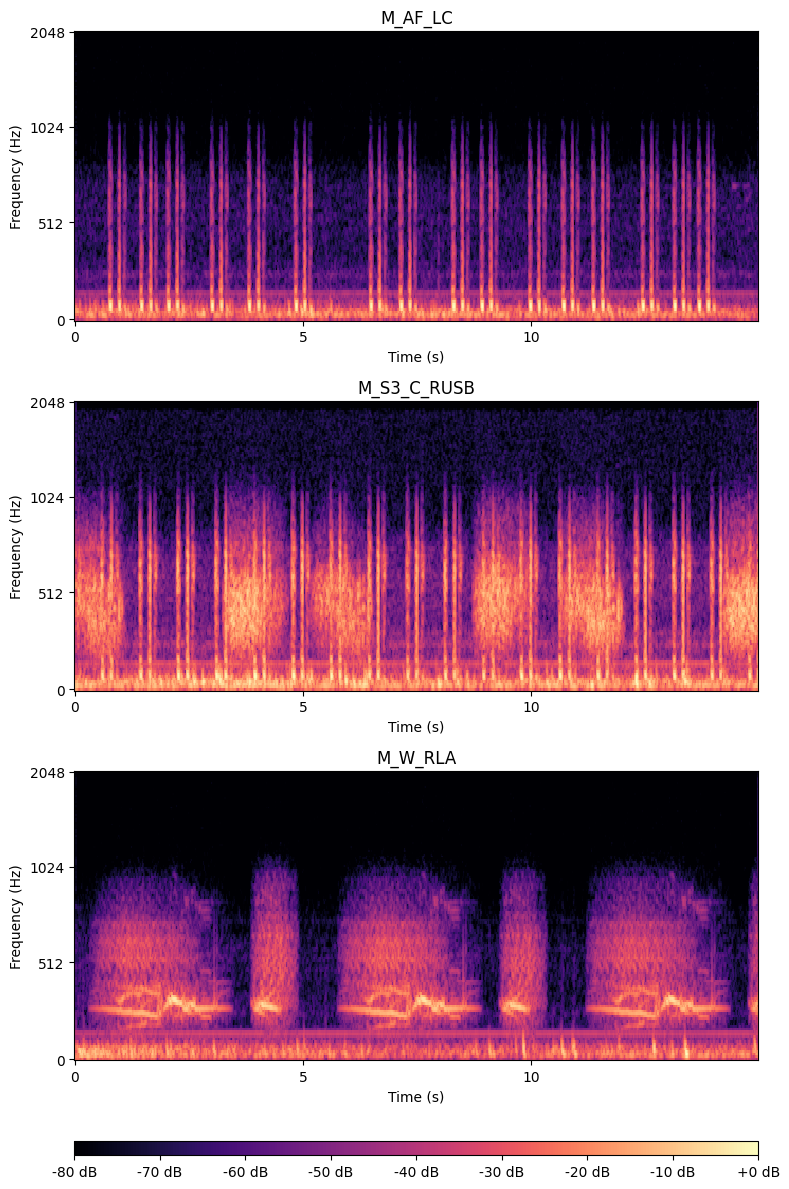

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Set up the figure with 3 rows and 1 column using gridspec
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 0.05])

# Define audio file paths and titles
audio_files = [
    ('/content/M_AF_LC.wav', 'M_AF_LC'),
    ('/content/M_S3_C_RUSB.wav', 'M_S3_C_RUSB'),
    ('/content/M_W_RLA.wav', 'M_W_RLA')
]

axs = [plt.subplot(gs[i]) for i in range(3)]  # Create 3 subplots for the spectrograms

# Plot spectrograms
for i, (audio_path, title) in enumerate(audio_files):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=2048)
    S_dB = librosa.power_to_db(S, ref=np.max)

    img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=2048, ax=axs[i])

    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')

# Add a color bar to the bottom of the last subplot
cbar_ax = plt.subplot(gs[3])
fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB', orientation='horizontal')

plt.tight_layout()
plt.show()


## Section 3: Playing Audio Using `librosa`'s Built-in Audio Playback

This section allows playback of audio files directly in the notebook using `IPython.display`'s `Audio` function.


In [27]:
import librosa
import IPython.display as ipd

# Define audio file paths and titles
audio_files = [
    ('/content/M_AF_LC.wav', 'M_AF_LC'),
    ('/content/M_S3_C_RUSB.wav', 'M_S3_C_RUSB'),
    ('/content/M_W_RLA.wav', 'M_W_RLA')
]

# Play audio files
for audio_path, title in audio_files:
    y, sr = librosa.load(audio_path)
    print(f"Playing {title}:")
    ipd.display(ipd.Audio(y, rate=sr))
    print("\n")

Playing M_AF_LC:




Playing M_S3_C_RUSB:




Playing M_W_RLA:


## Section 4: Donut Chart Visualization

This section visualizes the sound types in the dataset using a multi-layered donut chart, with the inner layer representing lung sounds, the middle representing heart sounds, and the outer layer representing mixed sounds.


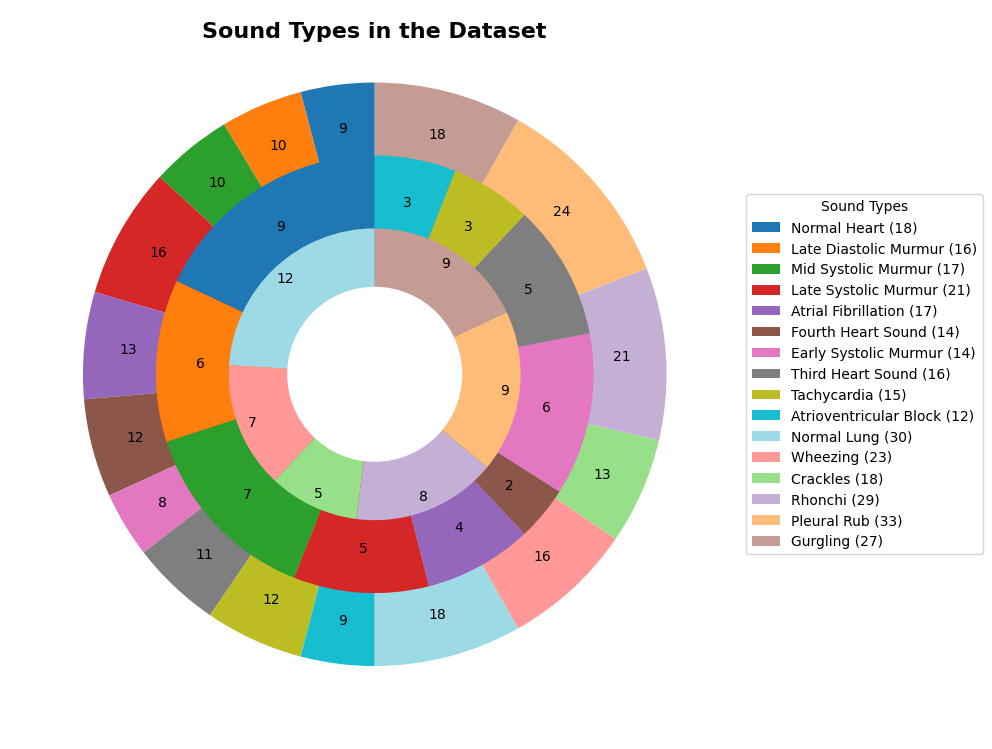

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the corrected values for each layer: heart, lung, and mixed sounds
heart_values_updated = [9, 6, 7, 5, 4, 2, 6, 5, 3, 3]  # Heart sounds
lung_values_updated = [12, 7, 5, 8, 9, 9]  # Lung sounds
mix_values_updated = [9, 10, 10, 16, 13, 12, 8, 11, 12, 9, 18, 16, 13, 21, 24, 18]  # Mixed sounds

# Define the sound types for each layer
heart_labels_updated = ['Normal Heart', 'Late Diastolic Murmur', 'Mid Systolic Murmur',
                        'Late Systolic Murmur', 'Atrial Fibrillation', 'Fourth Heart Sound',
                        'Early Systolic Murmur', 'Third Heart Sound', 'Tachycardia',
                        'Atrioventricular Block']
lung_labels_updated = ['Normal Lung', 'Wheezing', 'Crackles', 'Rhonchi',
                       'Pleural Rub', 'Gurgling']
mix_labels_updated = heart_labels_updated + lung_labels_updated

# Define a consistent color palette for all sound types across the three layers
color_mapping = {
    'Normal Heart': '#1f77b4', 'Late Diastolic Murmur': '#ff7f0e', 'Mid Systolic Murmur': '#2ca02c',
    'Late Systolic Murmur': '#d62728', 'Atrial Fibrillation': '#9467bd', 'Fourth Heart Sound': '#8c564b',
    'Early Systolic Murmur': '#e377c2', 'Third Heart Sound': '#7f7f7f', 'Tachycardia': '#bcbd22',
    'Atrioventricular Block': '#17becf', 'Normal Lung': '#9edae5', 'Wheezing': '#ff9896',
    'Crackles': '#98df8a', 'Rhonchi': '#c5b0d5', 'Pleural Rub': '#ffbb78', 'Gurgling': '#c49c94'
}

# Map the colors for each layer using the same color for the same sound type
heart_colors = [color_mapping[label] for label in heart_labels_updated]
lung_colors = [color_mapping[label] for label in lung_labels_updated]
mix_colors = [color_mapping[label] for label in mix_labels_updated]

# Define new legend labels with total counts for each sound type
legend_labels_with_counts = [
    f'Normal Heart (18)', f'Late Diastolic Murmur (16)', f'Mid Systolic Murmur (17)',
    f'Late Systolic Murmur (21)', f'Atrial Fibrillation (17)', f'Fourth Heart Sound (14)',
    f'Early Systolic Murmur (14)', f'Third Heart Sound (16)', f'Tachycardia (15)',
    f'Atrioventricular Block (12)', f'Normal Lung (30)', f'Wheezing (23)',
    f'Crackles (18)', f'Rhonchi (29)', f'Pleural Rub (33)', f'Gurgling (27)'
]

# Create the donut plot with the updated legend including total counts
fig, ax = plt.subplots(figsize=(10, 10))

# Outer layer (Mixed Sounds) - Add count numbers in the middle of each section
wedges, texts = ax.pie(mix_values_updated, radius=1, colors=mix_colors, startangle=90, pctdistance=0.85)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.85
    y = np.sin(np.deg2rad(angle)) * 0.85
    ax.text(x, y, str(mix_values_updated[i]), ha='center', va='center', fontsize=10)

# Middle layer (Heart Sounds) - Add count numbers in the middle of each section
wedges, texts = ax.pie(heart_values_updated, radius=0.75, colors=heart_colors, startangle=90, pctdistance=0.75)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.6
    y = np.sin(np.deg2rad(angle)) * 0.6
    ax.text(x, y, str(heart_values_updated[i]), ha='center', va='center', fontsize=10)

# Inner layer (Lung Sounds) - Add count numbers in the middle of each section
wedges, texts = ax.pie(lung_values_updated, radius=0.5, colors=lung_colors, startangle=90, pctdistance=0.65)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.45
    y = np.sin(np.deg2rad(angle)) * 0.45
    ax.text(x, y, str(lung_values_updated[i]), ha='center', va='center', fontsize=10)

# Add a circle at the center to make it a true donut chart
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Sound Types in the Dataset', fontsize=16, fontweight='bold', y=0.95)

# Add a legend outside the chart with total counts for each sound type
plt.legend(labels=legend_labels_with_counts, loc='center left', bbox_to_anchor=(1, 0.5), title="Sound Types")

# Display the chart with updated legend
plt.tight_layout()
plt.show()

## Acknowledgment and Copyright

We would like to acknowledge the Mohawk Institute for Applied Health Sciences (IAHS) for their assistance in data collection using the patient simulators.

If you use this dataset or any part of the associated code, please cite:
- Mendeley Data Repository: [INSERT Mendeley DOI HERE].
- Dataset Article: [INSERT Article DOI HERE].

© 2024 by Yasaman Torabi, Shahram Shirani, and James P. Reilly. All rights reserved.